# **BaseBall**

## **1.data exploration**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [54]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [55]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [56]:
df.shape

(30, 17)

In [57]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [59]:
df['W'].describe()

count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
max      100.000000
Name: W, dtype: float64

In [60]:
print(df.isnull().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


## **EDA**

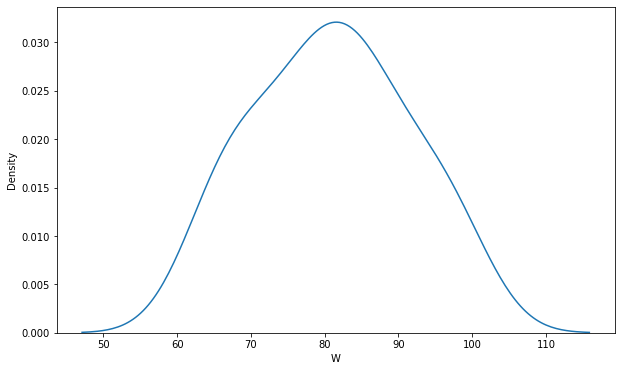

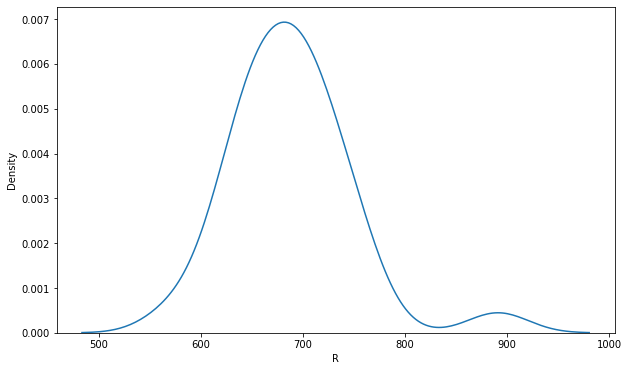

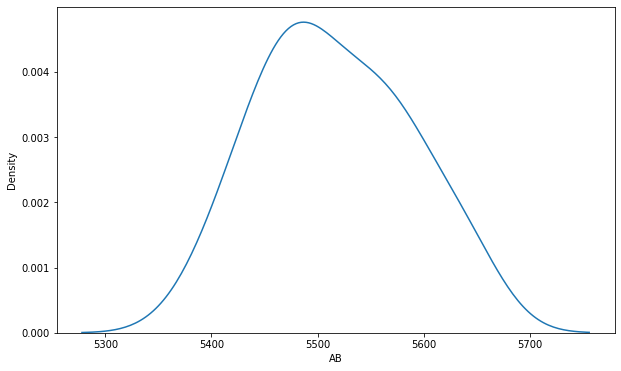

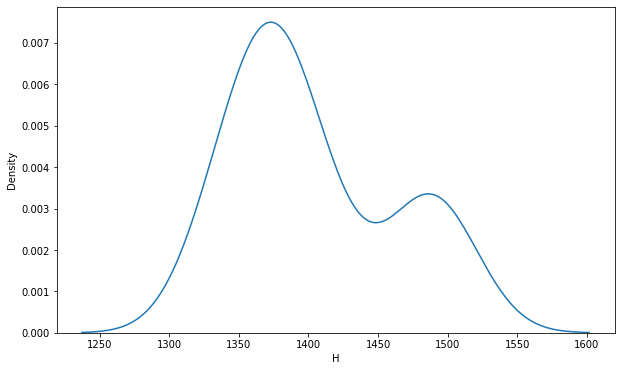

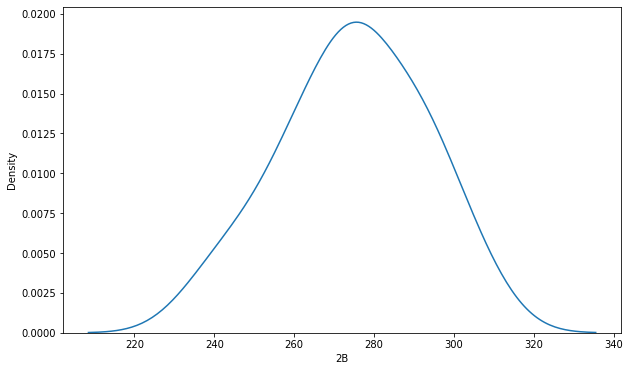

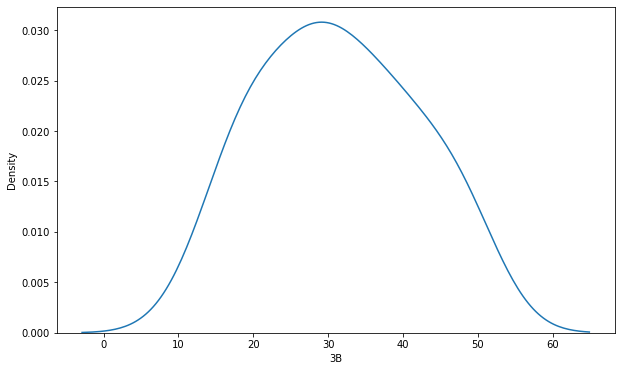

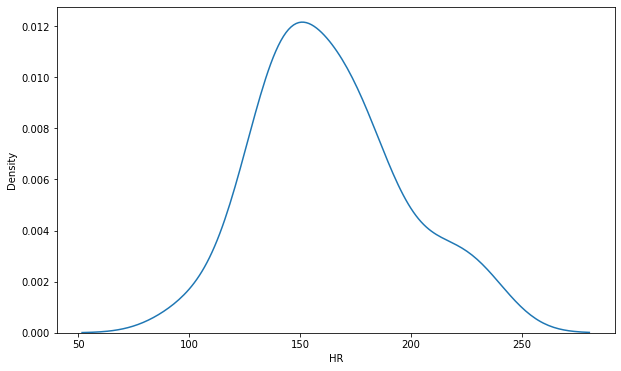

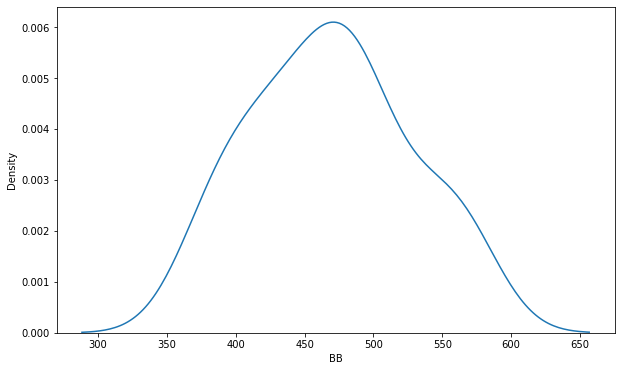

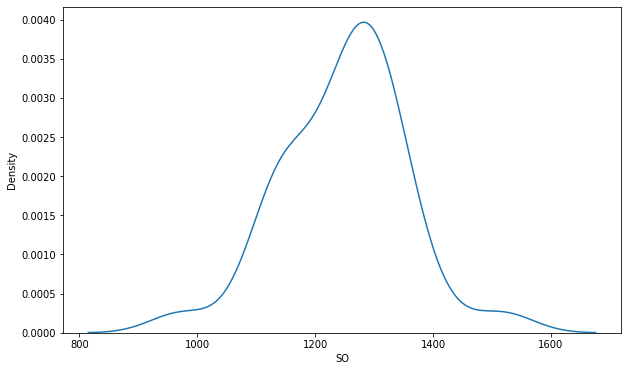

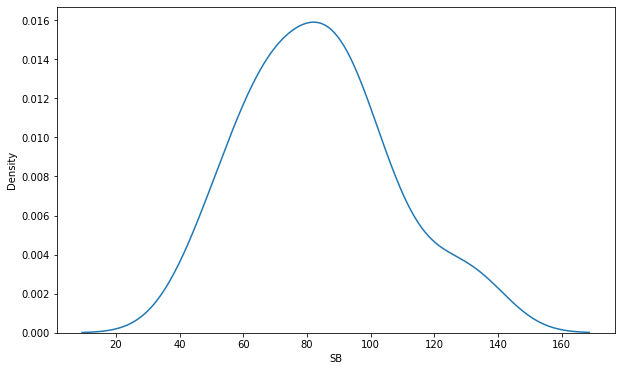

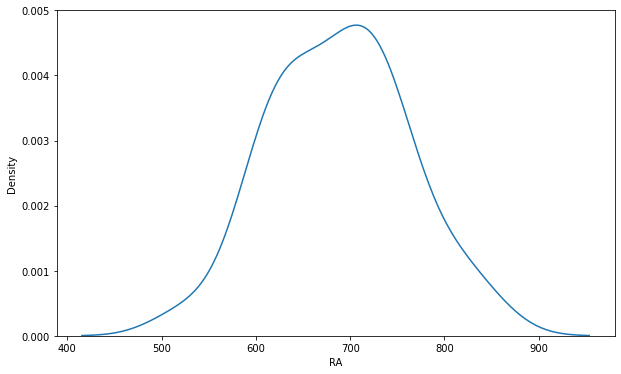

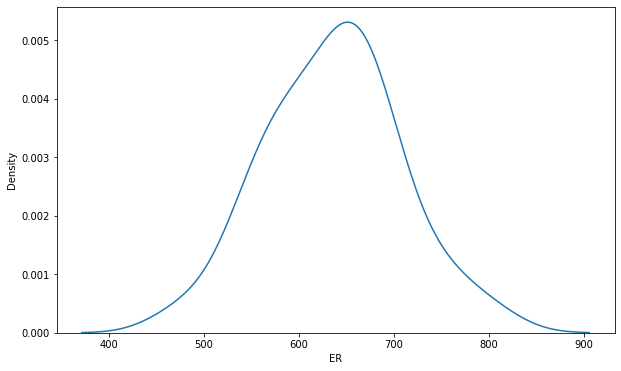

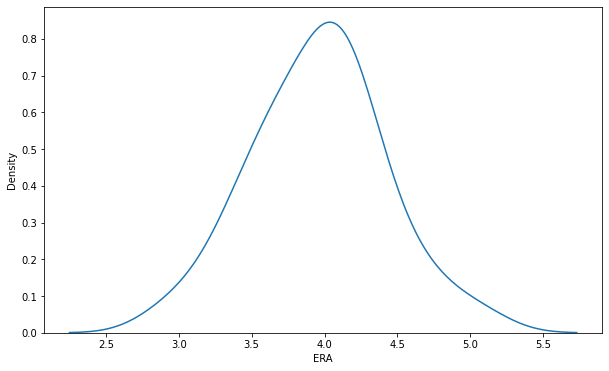

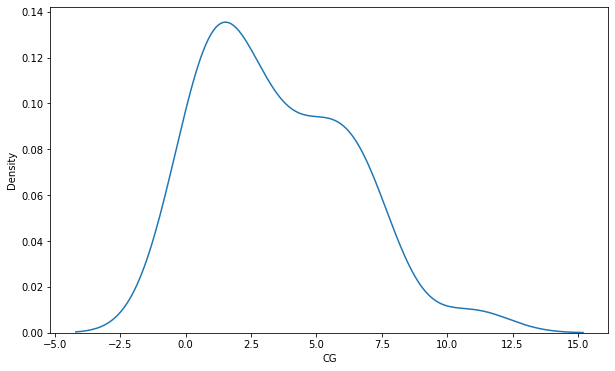

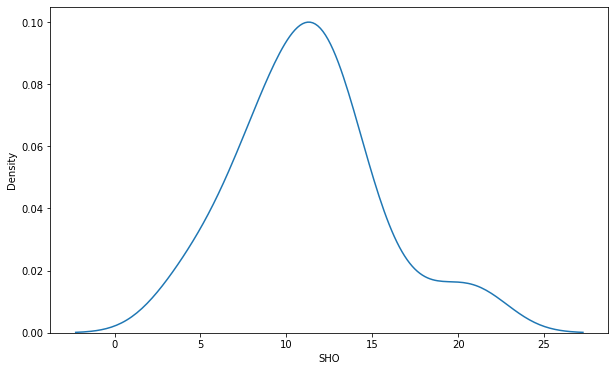

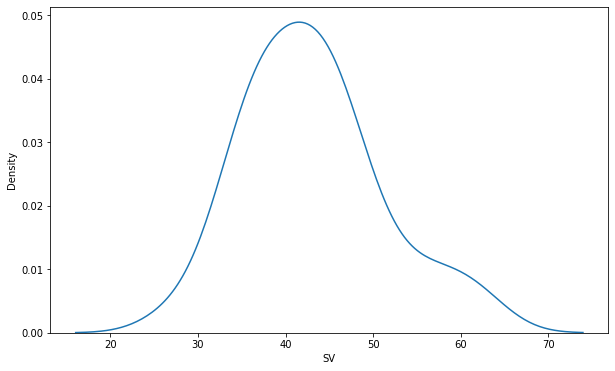

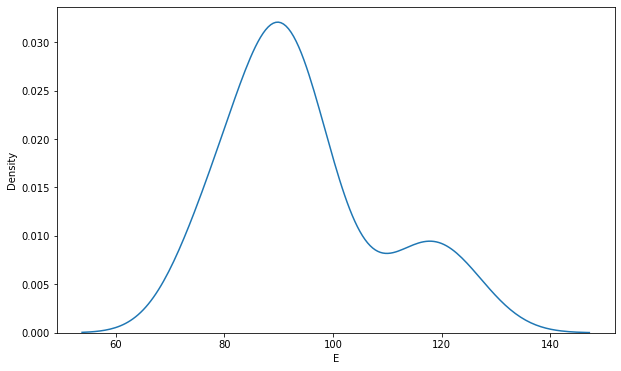

In [61]:
for i in df.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df[i])

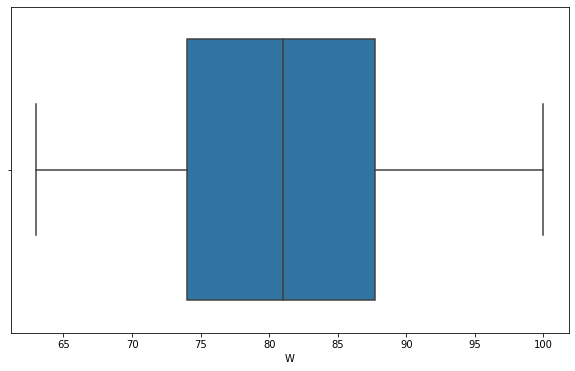

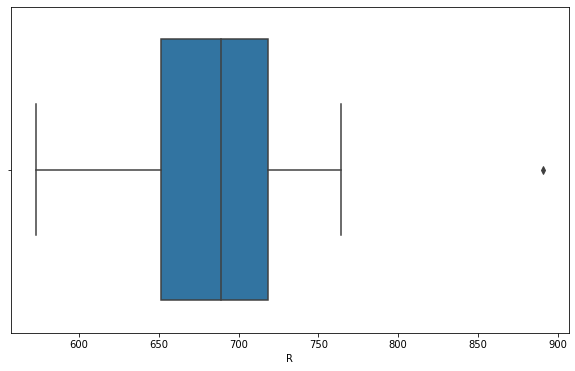

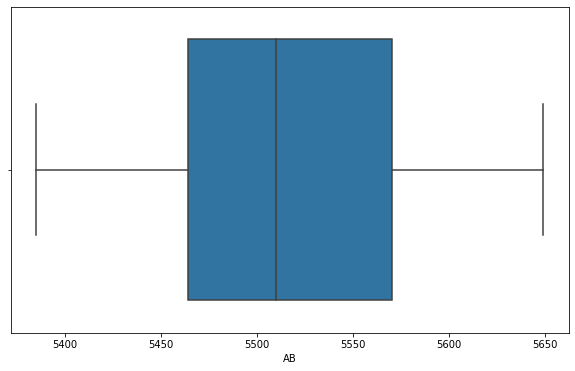

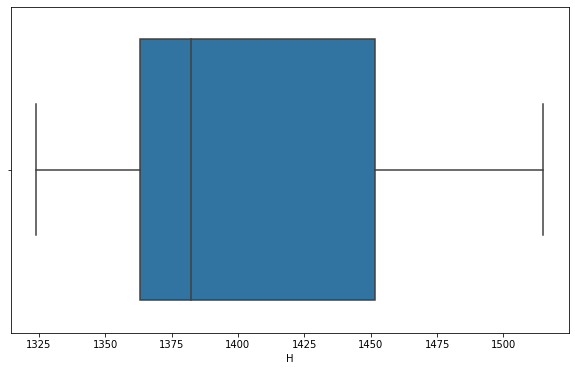

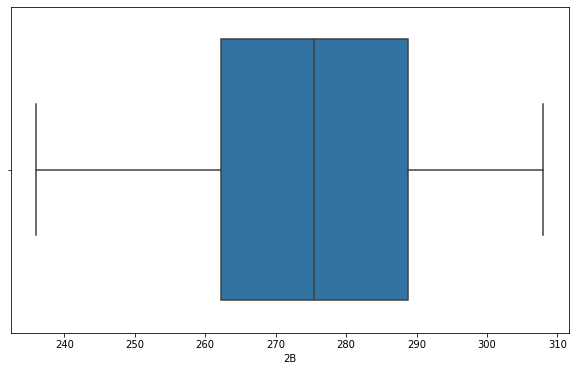

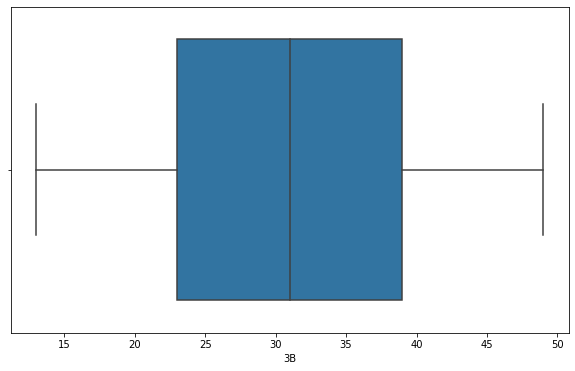

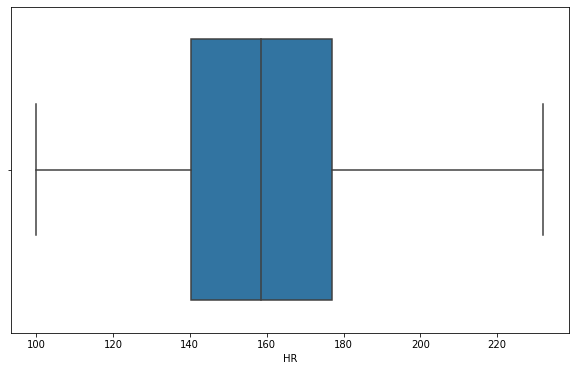

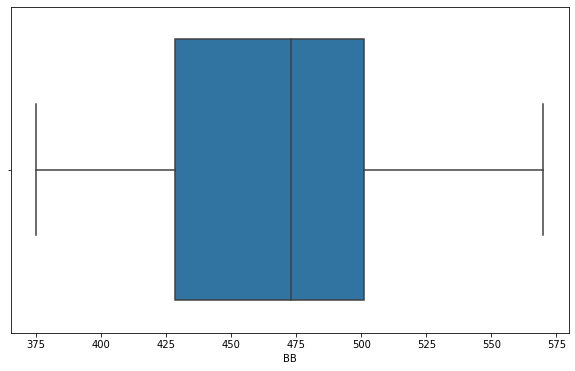

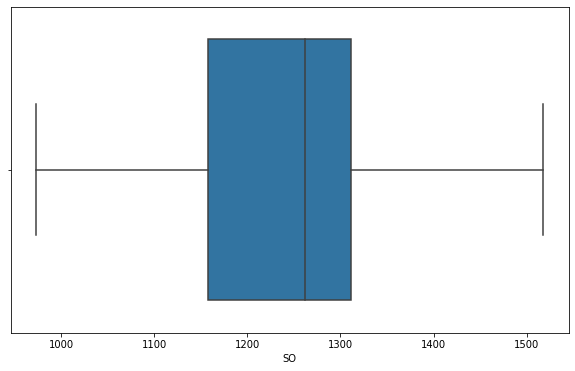

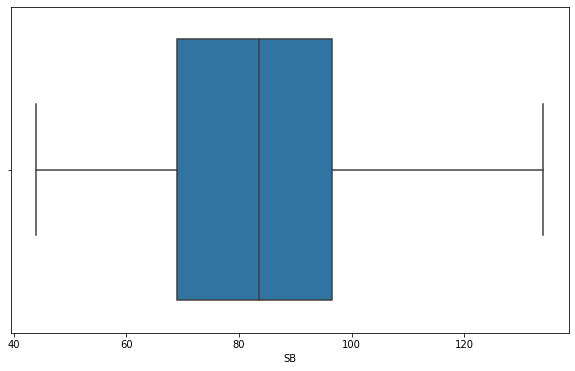

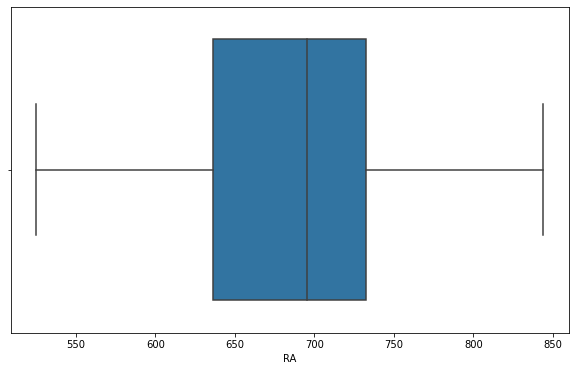

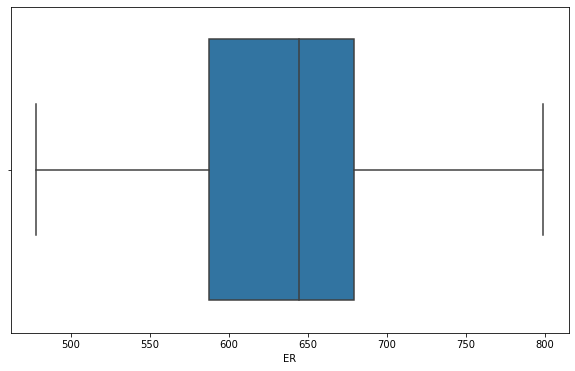

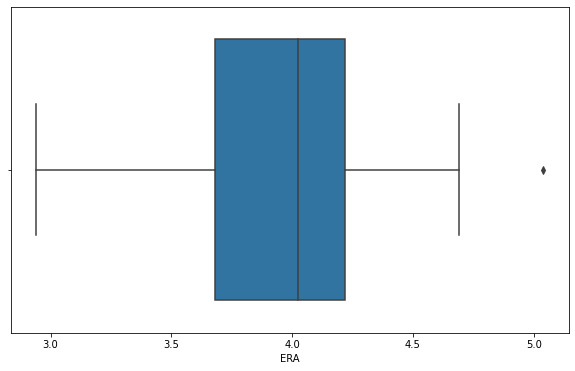

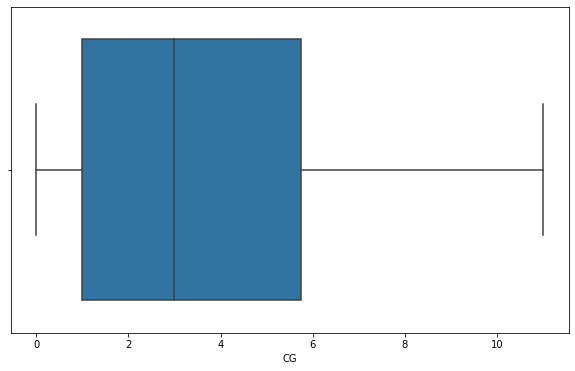

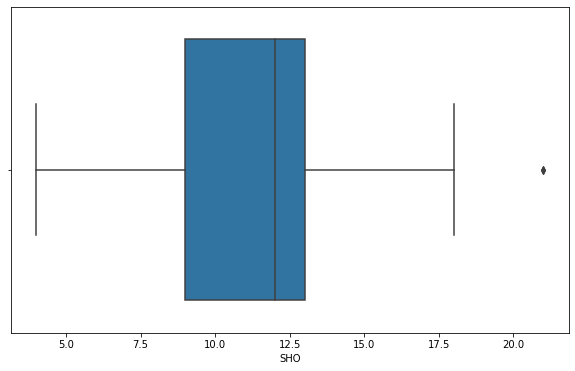

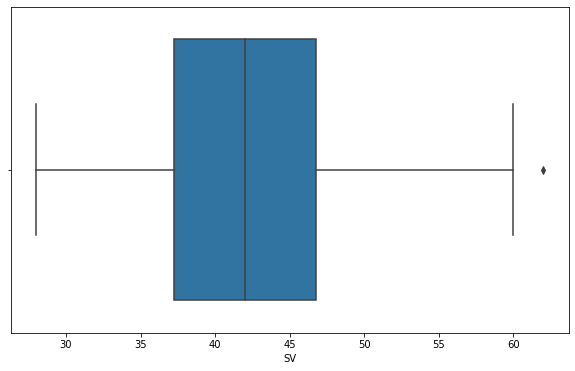

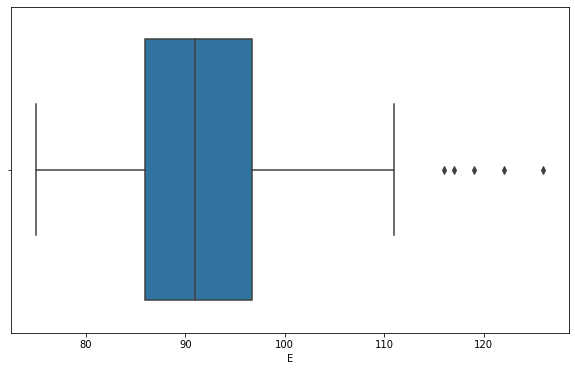

In [62]:
for i in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])

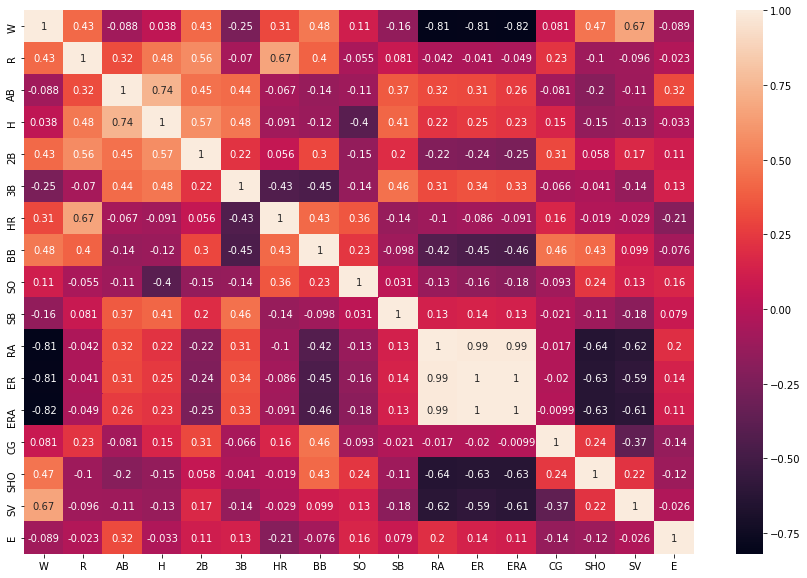

In [63]:
dfcor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,annot=True)


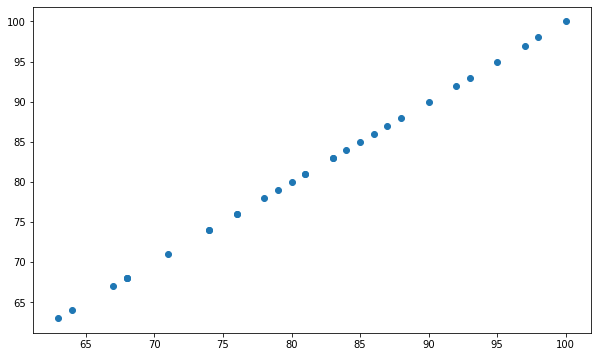

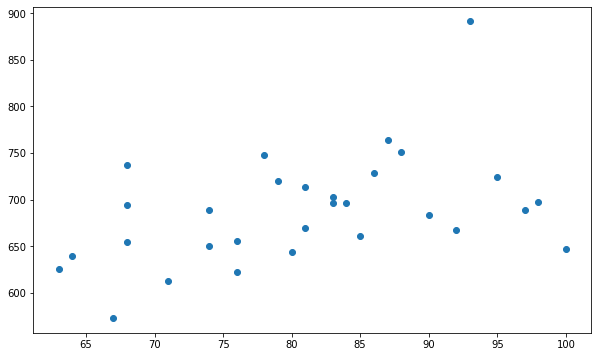

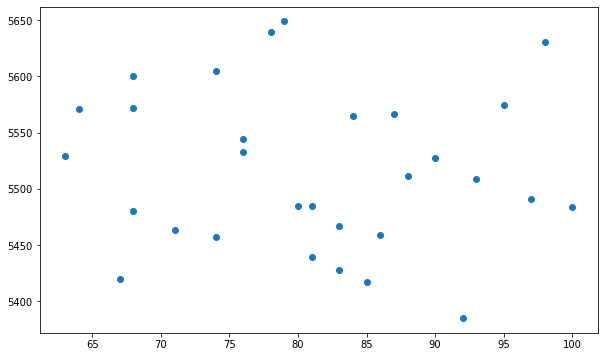

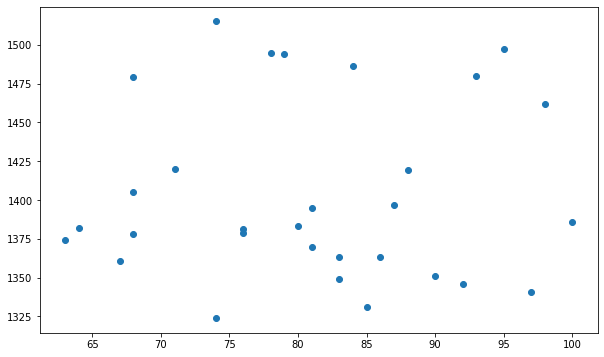

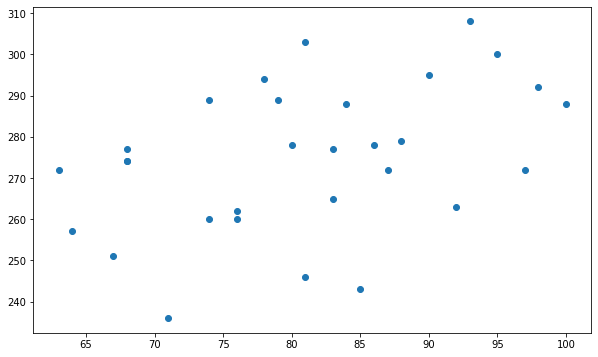

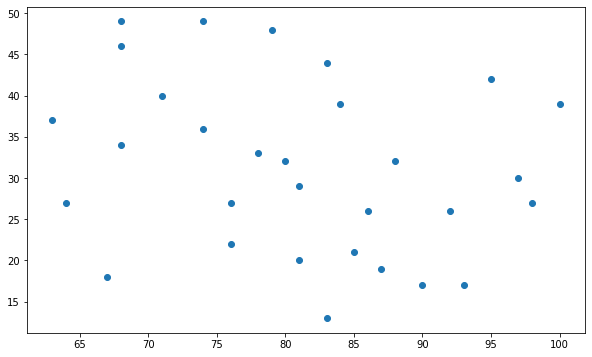

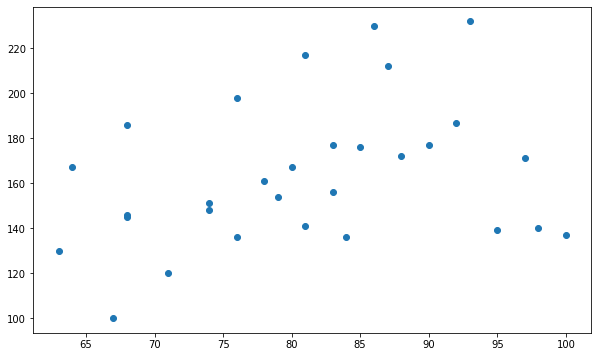

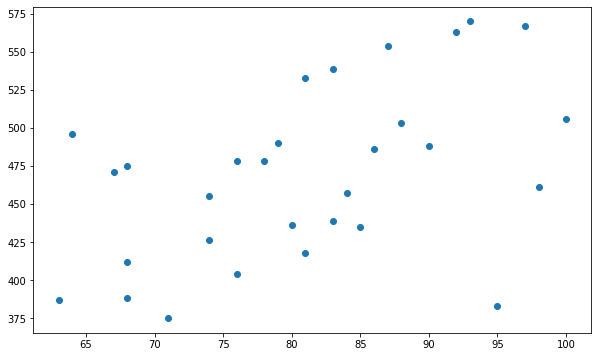

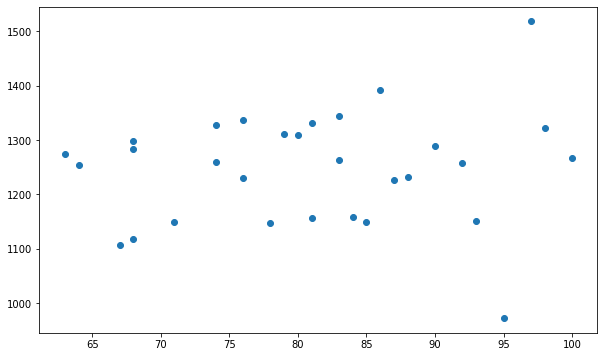

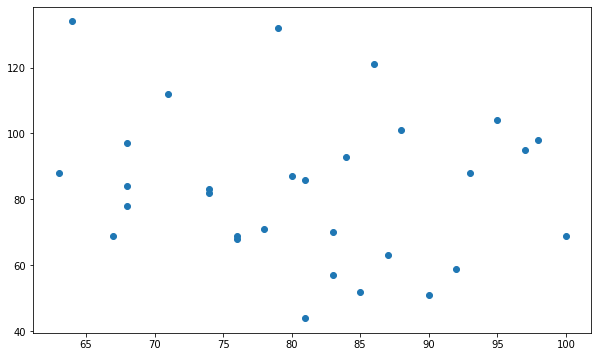

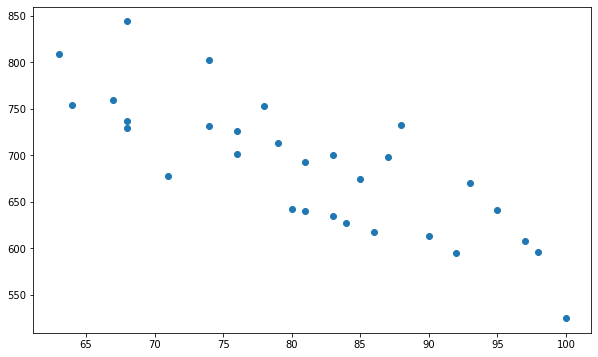

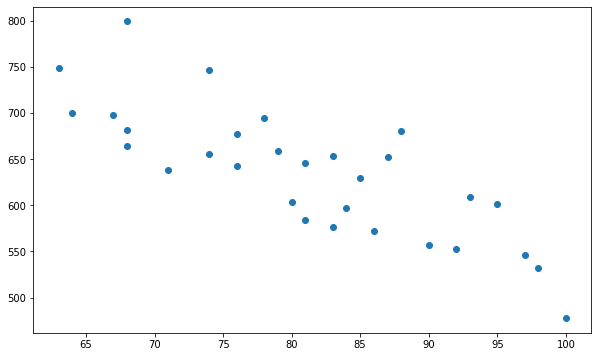

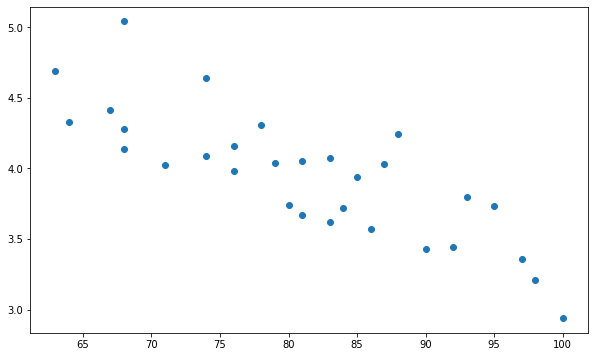

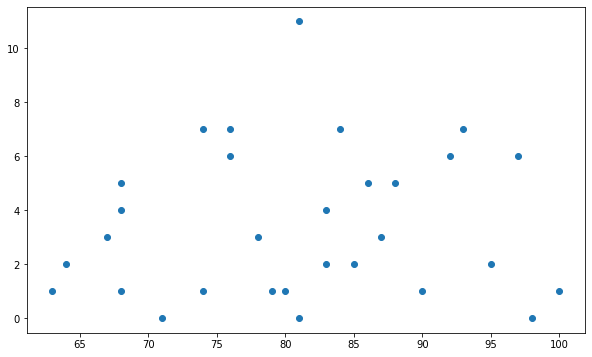

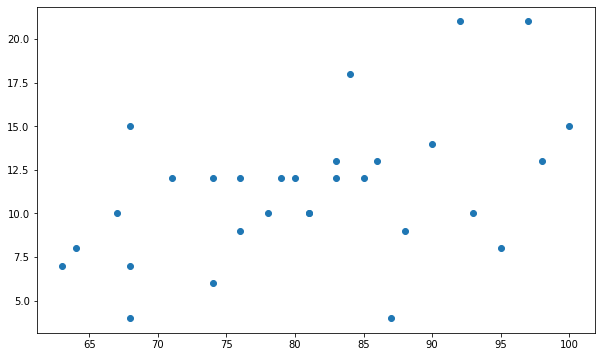

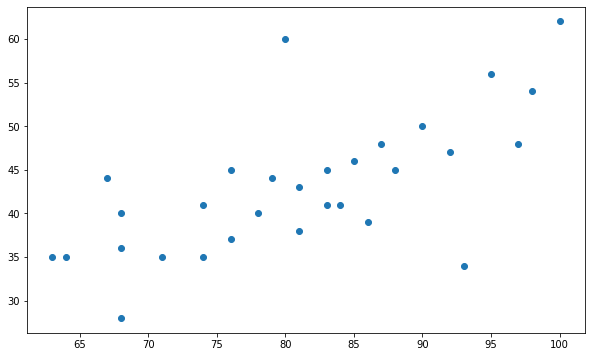

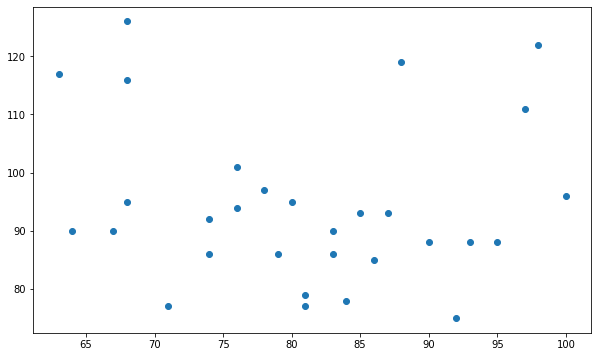

In [64]:
for i in df.columns:
  plt.figure(figsize=(10,6))
  plt.scatter(df["W"],df[i])

**All the above graphs are not correlated with each other**

## **PRE PROCESSING**

In [65]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

### **NO SKEWNESS PRESENT IN DATA**

### **SCALLING**

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX= scaler.fit_transform(df)

In [67]:
scaledX

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -5.06955186e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         2.54597523e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -6.41346840e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

## **train_test_split**

In [68]:
x= df.drop(columns='W')
y= df['W']

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## **MODEL CONSTRUCTION**

**LinearRegression**

In [71]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
predictions=lm.predict(x_test)

In [73]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions))

Mean Absolute Error:  4.472742221319938
Mean Squared Error:  25.865917321143897
Root Mean Squared Error:  5.085854630358982
Explained Variance Score:  0.81807304762574


In [74]:
print('r2_score:',r2_score(y_test,predictions))

r2_score: 0.8116559418363308


### **FINDING BEST random_state**

In [75]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm=LinearRegression()
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 0.298024892932911
least value 0 0.298024892932911
1 0.5874121667090016
2 3.0718181703951193
3 0.5104174914582994
4 0.49867762052680464
5 0.19859878205113768
least value 5 0.19859878205113768
6 0.11130505233459864
least value 6 0.11130505233459864
7 1.2186747951802852
8 0.37552795641094805
9 0.22677420509587798
10 1.1938093408189587
11 0.7313041771658122
12 2.1653963065211426
13 0.2983370971733741
14 0.1522036485072864
15 0.8831156252876172
16 0.7702173232430097
17 0.7320046875456115
18 0.5149780236804372
19 0.11140330568976098
20 0.6637926782277144
21 0.5258073104463101
22 0.9768438968377706
23 0.39112504147920557
24 4.921193774427704
25 0.5397897501325464
26 0.6416941358510269
27 0.27847805711916873
28 0.28982671117266423
29 0.07207059388902193
least value 29 0.07207059388902193
30 0.1129719200045679
31 0.7359488321257744
32 0.7182968335026727
33 0.25773350420432917
34 0.17473346478355045
35 0.7990887415686871
36 0.22358348384928262
37 0.3640570227054347
38 0.7356435128179405
39 0.1

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=68)

### **LinearRegression**

In [77]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.943371269274235


In [78]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  2.773650092806984
Mean Squared Error:  13.63306336526746
Root Mean Squared Error:  3.6922978435206795
Explained Variance Score:  0.8747554179718445
r2_score: 0.8732463116865629


**RandomForestRegressor**

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [80]:
predictions1=rf.predict(x_test)

In [81]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  7.151666666666668
Mean Squared Error:  77.43891666666669
Root Mean Squared Error:  8.799938446754425
Explained Variance Score:  0.2971646435950409
r2_score: 0.2800100723140494


**SVR**

In [82]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.0023980836337047506


In [83]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  9.325674439376295
Mean Squared Error:  126.06401241220199
Root Mean Squared Error:  11.227823137732532
Explained Variance Score:  0.0008116093648937728
r2_score: -0.1720827600308037


**DecisionTreeRegressor**

In [84]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [85]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  7.0
Mean Squared Error:  59.666666666666664
Root Mean Squared Error:  7.724420150837645
Explained Variance Score:  0.4824380165289256
r2_score: 0.4452479338842975


**GradientBoostingRegressor**

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9999993781034789


In [87]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  8.120659191201993
Mean Squared Error:  72.80317519003907
Root Mean Squared Error:  8.53247767005804
Explained Variance Score:  0.5385552822678092
r2_score: 0.32311097447277726


### **LINEAR REGRESSION HAVING HIGH R2 SCORE SO PERFORMING HYPER PARAMETER TUNING**

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [111]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 94.43868713271955
Cross Val Score: 32.38026856125373


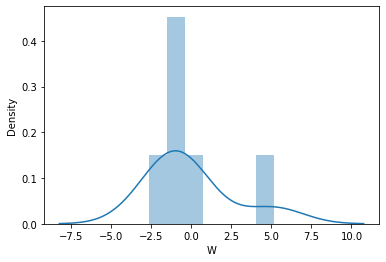

In [98]:
sns.distplot((y_test-pred_decision))

,Y Test,Prediction
19,64,64.826259
28,74,74.825048
29,68,67.753491
26,84,86.588554
2,81,82.144529


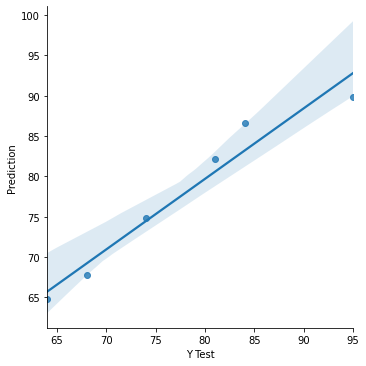

In [101]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred_decision},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

**FINAL MODEL IS CONSTRUCTED WITH ACURACY OF 94%**

In [113]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,pred_decision))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,pred_decision)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,pred_decision))
print('r2_score:',r2_score(y_test,pred_decision))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  1.7957117412370114
Mean Squared Error:  5.981500950586091
Root Mean Squared Error:  2.445710725042128
Explained Variance Score:  0.9443868791153025
r2_score: 0.9443868713271955


In [114]:
import joblib
joblib.dump(ls,"final model.pkl")

['final model.pkl']